# Libraries/Modules

In [2]:
# Importing Modules and Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Data Exploration

In [3]:
# Data
df = pd.read_csv('/content/drive/MyDrive/0_Hackathon_SBSSU/heart cd/hfpd.csv')
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina', 'ST_Slope', 'HeartDisease']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

## Report 1


1.   No Duplicates available
2.   No Missing values available



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[]

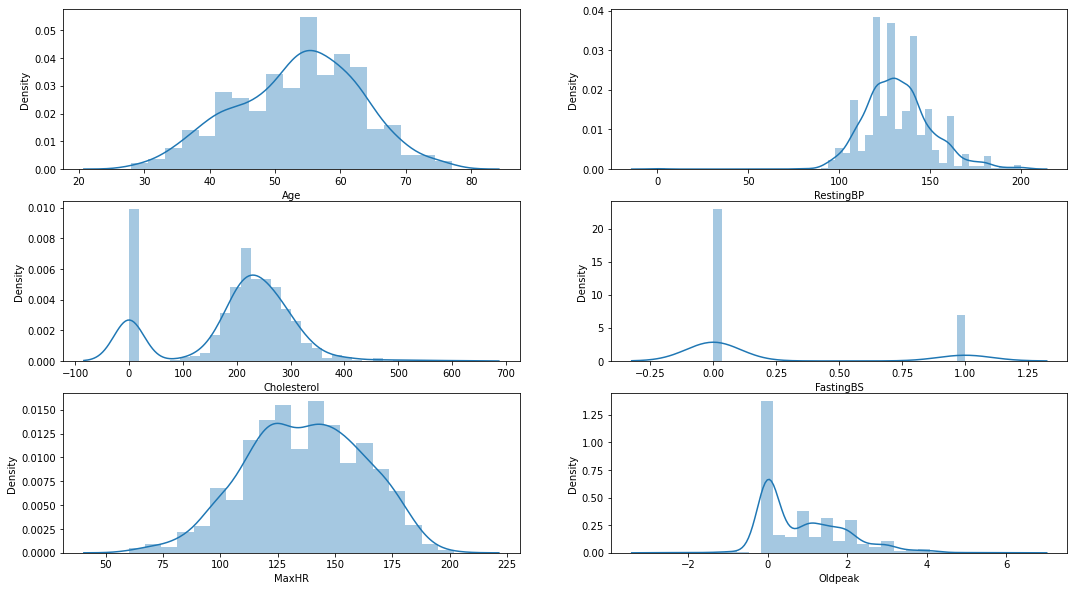

In [ ]:
# Visualising the numerical data
cols = numerical_features

plt.figure(figsize=(18,10))
i = 1
for col in cols:
  plt.subplot(3,2,i)
  sns.distplot(df[col])
  i += 1
plt.plot()

FastingBS is also a categorical variable having 0 and 1 values

therefore, updating

In [ ]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina', 'ST_Slope', 'FastingBS']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

[]

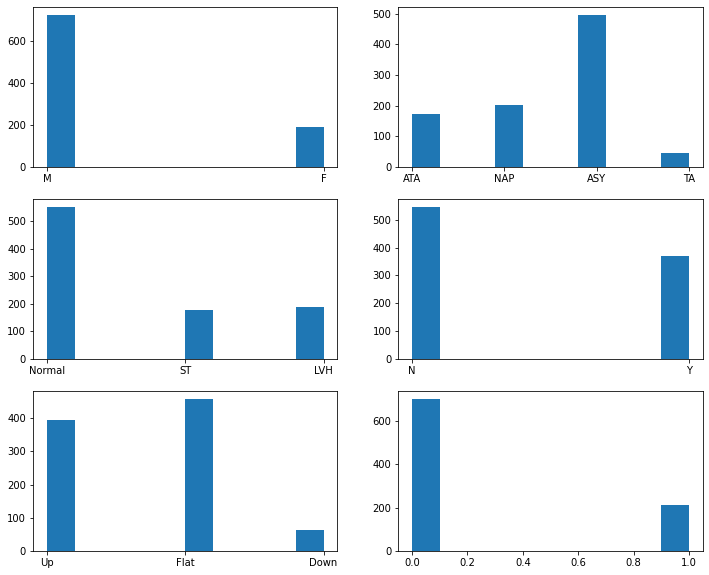

In [ ]:
# Visualising the categorical data
cols = categorical_features

plt.figure(figsize=(12,10))
i = 1
for col in cols:
  plt.subplot(3,2,i)
  plt.hist(df[col])
  i += 1
plt.plot()

# Categorical Variable Encoding

In [ ]:
# Getting Unique values first
cols = categorical_features

for col in cols:
  print("{} = {}".format(col,df[col].unique()))

Sex = ['M' 'F']
ChestPainType = ['ATA' 'NAP' 'ASY' 'TA']
RestingECG = ['Normal' 'ST' 'LVH']
ExerciseAngina = ['N' 'Y']
ST_Slope = ['Up' 'Flat' 'Down']
FastingBS = [0 1]


In [ ]:
ohe = OneHotEncoder(drop='first',sparse=False)
transformations = [('ohe1',ohe,cols)]

transformer = ColumnTransformer(transformations,remainder='passthrough')
columns = ['Sex', 
           'cpt_Ata','cpt_nap','cpt_ta',
           'resting_ecg_n','resting_ecg_st',
           'ExerciseAngina',
           'St_slope_flat','St_slope_up',
           'fasting_bs',
           'Age', 'RestingBP', 'Cholesterol','MaxHR','Oldpeak',
           'HeartDisease']

new_df_1 = pd.DataFrame(transformer.fit_transform(df),columns=columns)

for col in columns :
  if col=='Oldpeak':
    pass
  else :
    new_df_1 = new_df_1.astype({col:'int64'})

In [ ]:
new_df_1.head()

,Sex,cpt_Ata,cpt_nap,cpt_ta,resting_ecg_n,resting_ecg_st,ExerciseAngina,St_slope_flat,St_slope_up,fasting_bs,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,1,1,0,0,1,0,0,0,1,0,40,140,289,172,0.0,0
1,0,0,1,0,1,0,0,1,0,0,49,160,180,156,1.0,1
2,1,1,0,0,0,1,0,0,1,0,37,130,283,98,0.0,0
3,0,0,0,0,1,0,1,1,0,0,48,138,214,108,1.5,1
4,1,0,1,0,1,0,0,0,1,0,54,150,195,122,0.0,0


# To CSV : hfpd_1.csv (Preprocessed 1)

In [ ]:
new_df_1.to_csv('hfpd_1.csv')

# Scaling

In [ ]:
# Scaling of Numerical variables
columns = new_df_1.columns

scaler = MinMaxScaler()
new_df_2 = pd.DataFrame(scaler.fit_transform(new_df_1), columns=columns)

# Columns to be converted in int64
cat_columns = ['Sex', 'cpt_Ata', 'cpt_nap', 'cpt_ta', 'resting_ecg_n',
       'resting_ecg_st', 'ExerciseAngina', 'St_slope_flat', 'St_slope_up',
       'fasting_bs','HeartDisease']

for col in cat_columns :
  new_df_2 = new_df_2.astype({col:'int64'})

new_df_2.head()

,Sex,cpt_Ata,cpt_nap,cpt_ta,resting_ecg_n,resting_ecg_st,ExerciseAngina,St_slope_flat,St_slope_up,fasting_bs,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,1,1,0,0,1,0,0,0,1,0,0.244898,0.70,0.479270,0.788732,0.295455,0
1,0,0,1,0,1,0,0,1,0,0,0.428571,0.80,0.298507,0.676056,0.409091,1
2,1,1,0,0,0,1,0,0,1,0,0.183673,0.65,0.469320,0.267606,0.295455,0
3,0,0,0,0,1,0,1,1,0,0,0.408163,0.69,0.354892,0.338028,0.465909,1
4,1,0,1,0,1,0,0,0,1,0,0.530612,0.75,0.323383,0.436620,0.295455,0


# To CSV : hfpd_2.csv (preprocessed 2) - Scaled

In [ ]:
new_df_2.to_csv('hfpd_2.csv')

# Summary

In [ ]:
import pandas as pd
pd.DataFrame([[1,2,3,4]],columns=['a','c','d','y'])

,a,c,d,y
0,1,2,3,4
